# Problem Statement: - 
	The Departmental Store, has gathered the data of the products it sells on a Daily basis. Using Association Rules concepts, provide the insights on the rules and the plots.


# Objective :-
Using Association Rules concepts, provide the insights on the rules and the plots


In [20]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
dataset = pd.read_csv("D:\\360Digi\\Machine learning\\Association Rule\\groceries.csv", sep=";", header= None)

In [13]:
dataset.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [14]:
unique_items_list = []

# for each index it will iter row by row
for index, row in dataset.iterrows():  
    
    # splitting items with , and creating a new list for row & it will going add it agian 
    # ...item_series list for each iteration..so item_series will be list of lists..
    items_series = list(row.str.split(','))
    
    
    # agian reading each list elements from item_Series which is big list as mentioned above code
    for each_row_list in items_series:
        
        # iterating each item from each_row_lists
        for item in each_row_list:
            
            # for first iteration..unique_items_list is empty so first item directly append to it.
            #...from next onwards..it will start to check condition 'not in'
            #....& if item not found in unique_items_list list then it will append to it.
            #......finally we will get one unique item list..
            if item not in unique_items_list:
                unique_items_list.append(item)

In [15]:
unique_items_list

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'condensed milk',
 'long life bakery product',
 'butter',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'UHT-milk',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'cereals',
 'white bread',
 'bottled water',
 'chocolate',
 'curd',
 'flour',
 'dishes',
 'beef',
 'frankfurter',
 'soda',
 'chicken',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'packaged fruit/vegetables',
 'specialty bar',
 'butter milk',
 'pastry',
 'processed cheese',
 'detergent',
 'root vegetables',
 'frozen dessert',
 'sweet spreads',
 'salty snack',
 'waffles',
 'candy',
 'bathroom cleaner',
 'canned beer',
 'sausage',
 'brown bread',
 'shopping bags',
 'beverages',
 'hamburger meat',
 'spices',
 'hygiene articles',
 'napkins',
 'pork',
 'berries',
 'whipped/sour cream',
 'artif. sweetener',
 'grapes',
 'd

In [16]:
df_apriori = pd.DataFrame(columns=unique_items_list)

In [17]:
df_apriori

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products


In [18]:
dataset1 =df_apriori.copy()

In [21]:
## If for the item names obesrved w.r.t. each list will be assigned as number 1 & those items are not in 
##...row number iterating will be assigned with nuber 0.

for index, row in dataset.iterrows():
    items = str(row[0]).split(',')
    one_hot_encoding = np.zeros(len(unique_items_list),dtype=int)
    for item_name in items:
        for i,column in enumerate(dataset1.columns):
            if item_name == column:
                one_hot_encoding[i] = 1
    dataset1.at[index] = one_hot_encoding

# Transction encoder is fastest method to do all this.

In [22]:
dataset1.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
zero =[]
one = []
for i in df_apriori.columns:
    zero.append(list(dataset1[i].value_counts())[0])
    one.append(list(dataset1[i].value_counts())[1])

In [37]:
count_df = pd.DataFrame([zero,one], columns=df_apriori.copy().columns)

In [25]:
count_df.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,9021,9661,9259,9817,8803,8463,9264,7322,9091,9445,...,9834,9812,9812,9827,9823,9831,9810,9834,9831,9833
1,814,174,576,18,1032,1372,571,2513,744,390,...,1,23,23,8,12,4,25,1,4,2


In [26]:

count_df.index = ['Not_Purchased', 'Purchased']
count_df

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
Not_Purchased,9021,9661,9259,9817,8803,8463,9264,7322,9091,9445,...,9834,9812,9812,9827,9823,9831,9810,9834,9831,9833
Purchased,814,174,576,18,1032,1372,571,2513,744,390,...,1,23,23,8,12,4,25,1,4,2


In [27]:

print('maximum purchased item:',count_df.idxmax(axis = 1)[1],':',count_df.loc['Purchased'].max())
print('minimum purchased item:',count_df.idxmax(axis = 1)[0],':',count_df.loc['Not_Purchased'].max())

maximum purchased item: whole milk : 2513
minimum purchased item: baby food : 9834


In [28]:

sorted_df = pd.DataFrame(count_df.sort_values(by=['Purchased'],axis=1,ascending=False).transpose())
sorted_df.head(20)

,Not_Purchased,Purchased
whole milk,7322,2513
other vegetables,7932,1903
rolls/buns,8026,1809
soda,8120,1715
yogurt,8463,1372
bottled water,8748,1087
root vegetables,8763,1072
tropical fruit,8803,1032
shopping bags,8866,969
sausage,8911,924


In [29]:

sorted_df['Purchased%']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df.head()

,Not_Purchased,Purchased,Purchased%
whole milk,7322,2513,0.057947
other vegetables,7932,1903,0.043881
rolls/buns,8026,1809,0.041714
soda,8120,1715,0.039546
yogurt,8463,1372,0.031637


# EDA

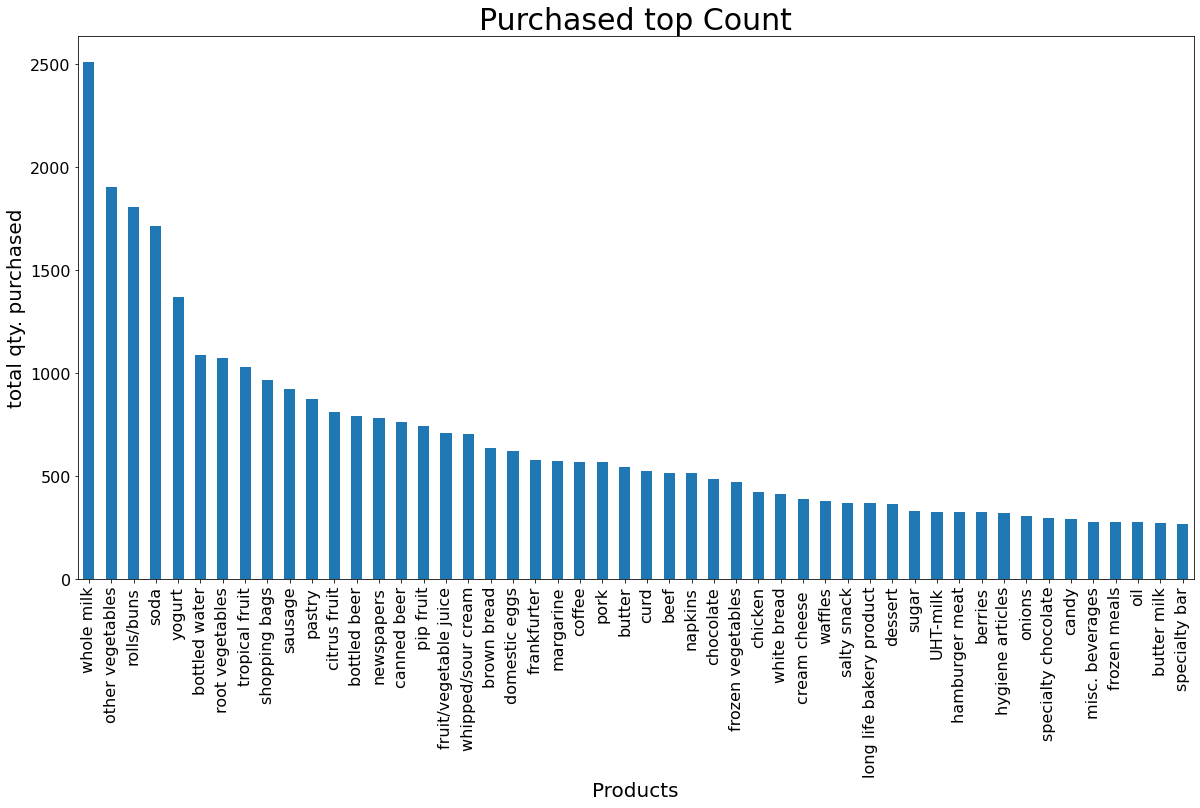

In [30]:

fig = plt.subplots(figsize=(20,10))
purchased = sorted_df.head(50).xs('Purchased' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('total qty. purchased', fontsize=20)
plt.show()

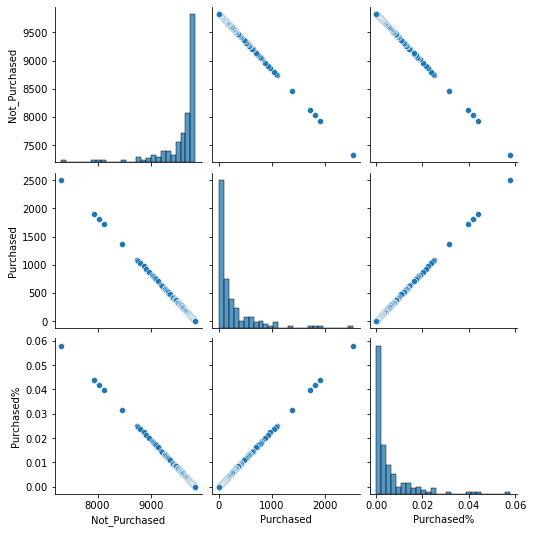

<Figure size 576x576 with 0 Axes>

In [38]:
sns.pairplot(sorted_df)
plt.figure(figsize=(8,8))
plt.show()

<AxesSubplot:>

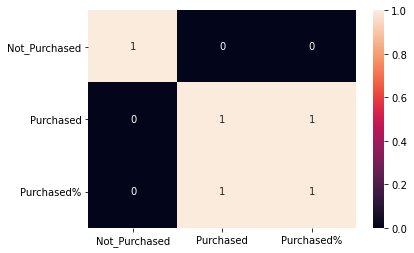

In [39]:
a = sorted_df.corr(method ='pearson')
sns.heatmap(a>0.85,annot=True)

In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(dataset1, min_support=0.02, use_colnames=True, max_len=5)

<ipython-input-41-b6a00b440570>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')


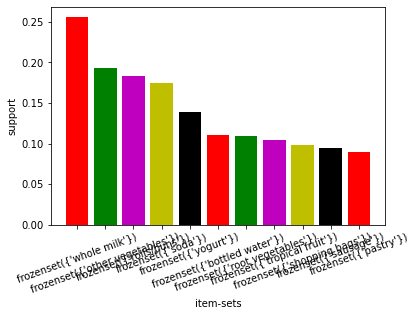

In [41]:

# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [33]:

rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1153,"(yogurt, other vegetables)","(tropical fruit, whole milk)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
1152,"(tropical fruit, whole milk)","(yogurt, other vegetables)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
1060,"(yogurt, root vegetables)","(other vegetables, whole milk)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638
1061,"(other vegetables, whole milk)","(yogurt, root vegetables)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
772,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
773,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
1154,"(yogurt, whole milk)","(tropical fruit, other vegetables)",0.056024,0.035892,0.007626,0.136116,3.792358,0.005615,1.116016
1151,"(tropical fruit, other vegetables)","(yogurt, whole milk)",0.035892,0.056024,0.007626,0.212465,3.792358,0.005615,1.198645
1028,"(other vegetables, beef)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
1033,(root vegetables),"(other vegetables, beef)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197


In [34]:
##########################extra ##################### Redudancy is defined as the storing of same data multiple time##########
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
772,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1028,"(other vegetables, beef)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
690,"(tropical fruit, other vegetables)",(pip fruit),0.035892,0.075648,0.009456,0.263456,3.482649,0.006741,1.254985
1016,"(whole milk, beef)",(root vegetables),0.021251,0.108998,0.008033,0.377990,3.467851,0.005716,1.432456
534,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
558,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
1054,"(yogurt, other vegetables, whole milk)",(root vegetables),0.022267,0.108998,0.007829,0.351598,3.225716,0.005402,1.374150
360,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
782,"(tropical fruit, other vegetables)",(citrus fruit),0.035892,0.082766,0.009049,0.252125,3.046248,0.006079,1.226454
1082,"(tropical fruit, other vegetables)",(whipped/sour cream),0.035892,0.071683,0.007829,0.218130,3.042995,0.005256,1.187304


In [ ]:
#Building Association rules using confidence metrics

In [35]:
# for this we need support value dataframe..that is fre_items from measure1.

confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

# min_threshold is nothing but setting min % crieteria. In this case i have choosen 20% 
#...confidence should be minimum 20%.

In [36]:
confidence_association.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
2,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,0.012862,1.238674
3,(margarine),(whole milk),0.058566,0.255516,0.024199,0.413194,1.617098,0.009235,1.268706
4,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594
5,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873
6,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
7,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
8,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
9,(tropical fruit),(rolls/buns),0.104931,0.183935,0.024606,0.234496,1.274886,0.005305,1.066050


###### 1 . Antecedent and Consequent
The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.

2. antecedent support
It is antecedent support with all transction numbers.

3. consequent support
It is consequent support with all transction numbers.

4. Support:
Here support is considered for antecedent+consequent combination.

5. confidence
Confidence is related to 'consequent item' or 'consequent item combination' w.r.t. antecedent item or item set.

6. lift
Lift measures how many times more often X and Y occur together than expected if they where statistically independent. Lift is not down-ward closed and does not suffer from the rare item problem.

In short firm possibilities of buying consequent whenever Antecedent item is purchaed by customer

7. Leverage
Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells.

leverage also can suffer from the rare item problem.

leverage(X -> Y) = P(X and Y) - (P(X)P(Y))

8. conviction
conviction(X -> Y) = P(X)P(not Y)/P(X and not Y)=(1-sup(Y))/(1-conf(X -> Y))

Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y. In that respect it is similar to lift (see section about lift on this page), however, it contrast to lift it is a directed measure. Furthermore, conviction is monotone in confidence and lift.

9. Coverage
coverage(X) = P(X) = sup(X)

A simple measure of how often a item set appears in the data set.

# Summary:

1- Above the 10 unique Rule that we get by Apply Apriori Algo.

2- Antecedent support variable tells us probability of antecedent product alone.

3- The Support Value is the value of the two Product(Antecedents and Consequents)

4- Confidence is an indication of how often the rule has been found to be True.

5-The ratio of the observed support to that expected if X and Y were independent.